### Project begins

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = np.loadtxt('data_total.txt')
print(data.shape)

(8400, 2500)


In [2]:
Y = np.zeros([7*12*100,1])
ct2 = 0
for ii in range(1,8):
    for jj in range(1,13):
        for kk in range(1,101):
            Y[ct2] = int(ii)
            ct2 += 1

In [3]:
X = data/250.0
y = Y.ravel()
print(X.shape)
print(y.shape)

(8400, 2500)
(8400,)


In [4]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

### determine max_depth

In [31]:
mds = [dd for dd in range(1,30,2)]
accuracy_mds = []

for md in mds:
    dtc = DecisionTreeClassifier(criterion='gini',
                                 splitter='best',
                                 max_depth=md,
                                 min_samples_split=2,
                                 min_samples_leaf=1,
                                 min_weight_fraction_leaf=0.0,
                                 max_features=None,
                                 random_state=None,
                                 max_leaf_nodes=None,)
    dtc.fit(X_train, y_train)
    y_pred_mds = dtc.predict(X_test)
    dummy = accuracy_score(y_test, y_pred_mds)
    accuracy_mds.append(dummy)

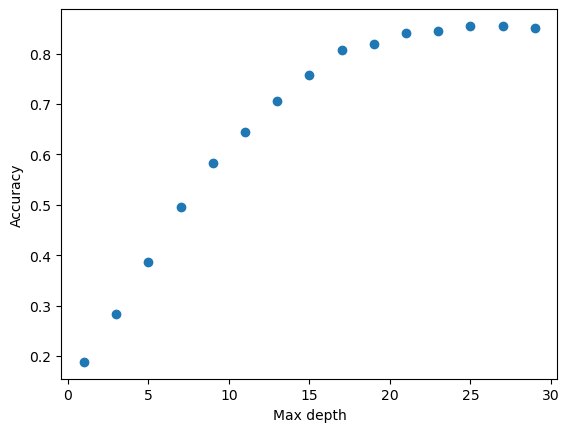

In [32]:
plt.scatter(mds, accuracy_mds)
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.savefig('dt_max_depth.png',dpi=300)
plt.show()

### determine min_sample_split

In [40]:
mss = [d for d in range(2,12*100,20)]
accuracy_mss = []

for i in mss:
    dtc = DecisionTreeClassifier(criterion='gini',
                                 splitter='best',
                                 max_depth=20,
                                 min_samples_split=i,
                                 min_samples_leaf=1,
                                 min_weight_fraction_leaf=0.0,
                                 max_features=None,
                                 random_state=None,
                                 max_leaf_nodes=None,)
    dtc.fit(X_train, y_train)
    y_pred_mss = dtc.predict(X_test)
    dummy = accuracy_score(y_test, y_pred_mss)
    accuracy_mss.append(dummy)

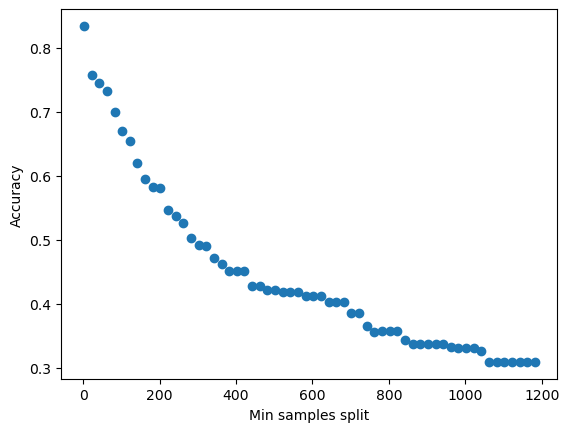

In [41]:
plt.scatter(mss, accuracy_mss)
plt.xlabel('Min samples split')
plt.ylabel('Accuracy')
plt.savefig('dt_min_samples_split.png',dpi=300)
plt.show()

### determine min_sample_leaf

In [8]:
msl = [d for d in range(1,100,5)]
accuracy_msl = []

for i in msl:
    dtc = DecisionTreeClassifier(criterion='gini',
                                 splitter='best',
                                 max_depth=20,
                                 min_samples_split=2,
                                 min_samples_leaf=i,
                                 min_weight_fraction_leaf=0.0,
                                 max_features=None,
                                 random_state=None,
                                 max_leaf_nodes=None,)
    dtc.fit(X_train, y_train)
    y_pred_msl = dtc.predict(X_test)
    dummy = accuracy_score(y_test, y_pred_msl)
    accuracy_msl.append(dummy)

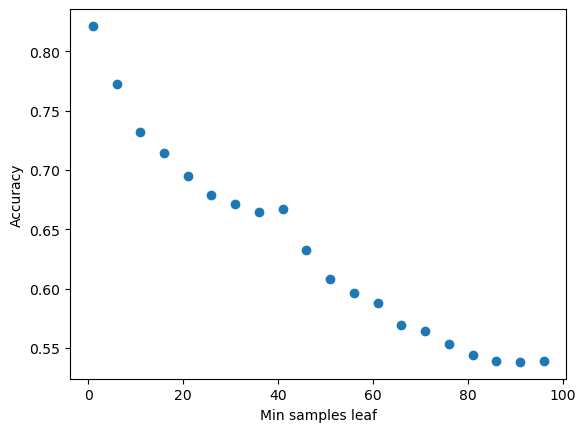

In [10]:
plt.scatter(msl, accuracy_msl)
plt.xlabel('Min samples leaf')
plt.ylabel('Accuracy')
plt.savefig('dt_min_samples_leaf.png',dpi=300)
plt.show()

In [6]:
dtc = DecisionTreeClassifier(criterion='gini',
                             splitter='best',
                             max_depth=20,
                             min_samples_split=2,
                             min_samples_leaf=1,
                             min_weight_fraction_leaf=0.0,
                             max_features=None,
                             random_state=None,
                             max_leaf_nodes=None,)

In [7]:
# Fit
dtc.fit(X_train, y_train)

# Predict
y_pred_dtc = dtc.predict(X_test)

# Evaluation of the decision tree classifier
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
precision_dtc = precision_score(y_test, y_pred_dtc, average='weighted')
recall_dtc = recall_score(y_test, y_pred_dtc, average='weighted')

In [8]:
print("Decision Tree Classifier:")
print(f"Accuracy: {accuracy_dtc:.2f}")
print(f"Precision: {precision_dtc:.2f}")
print(f"Recall: {recall_dtc:.2f}")

Decision Tree Classifier:
Accuracy: 0.84
Precision: 0.85
Recall: 0.84


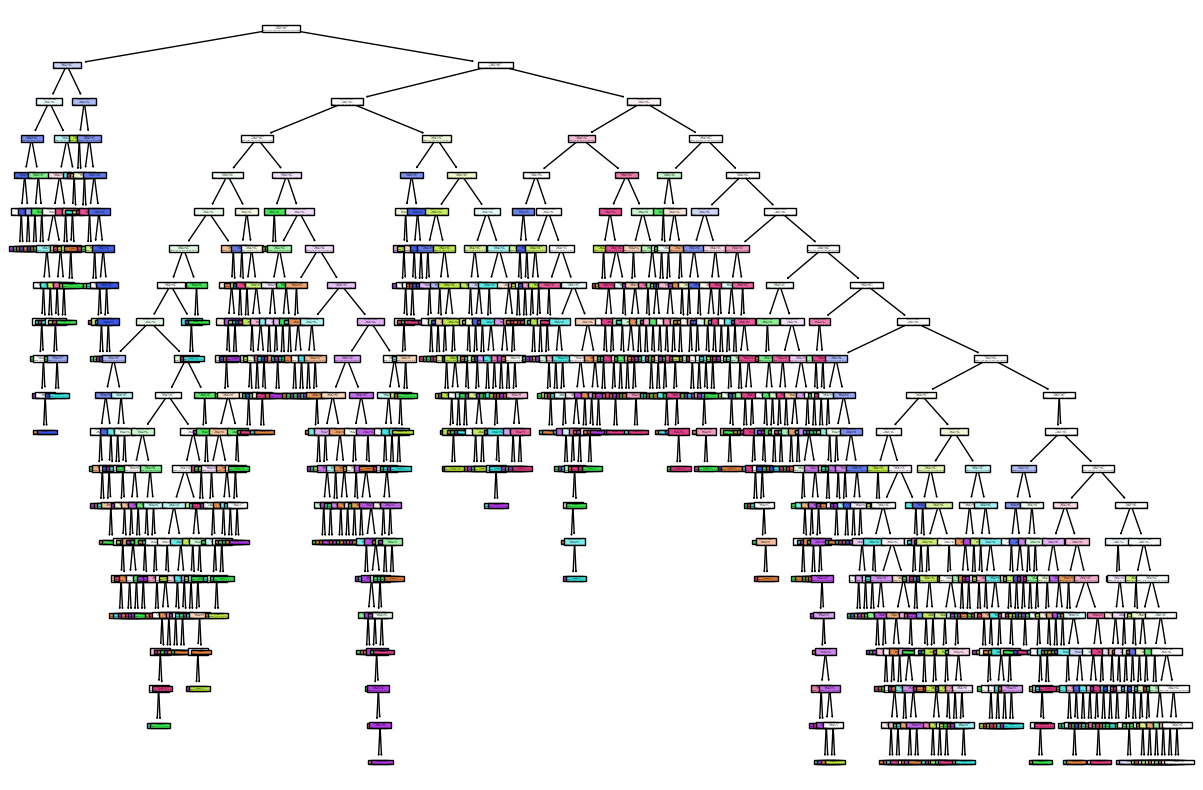

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(dtc, filled=True,)
plt.savefig('dt.png',dpi=300)
plt.show()

### random forest classifer

In [7]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest Classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9125


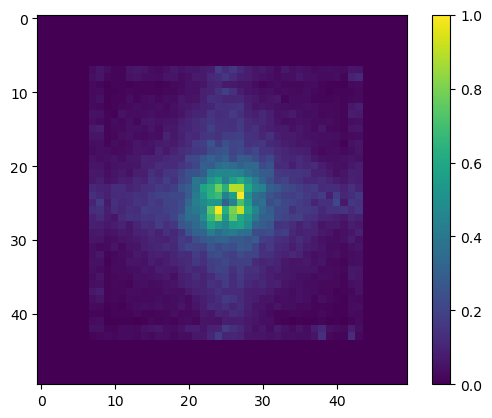

In [8]:
# feature importances
importances = rf_classifier.feature_importances_

# Reshape the feature importances into the original image shape
importances_norm = (importances - np.min(importances)) / (np.max(importances) - np.min(importances))

# Visualize the feature importances using a heatmap
plt.imshow(importances_norm.reshape(50, 50, 1))
plt.colorbar()
plt.show()

In [9]:
print(importances_norm.shape)

(2500,)


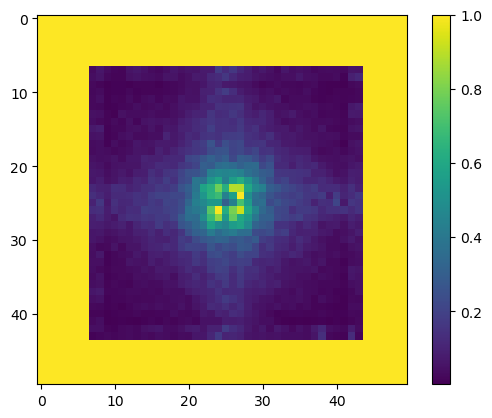

In [12]:
newvec = []

for i in importances_norm:
    if i <= 0.00:
        i = 1
    newvec.append(i)
        
newvec = np.array(newvec)
plt.imshow(newvec.reshape(50, 50, 1))
plt.colorbar()
plt.show()

In [38]:
newvec = []

for i in importances_norm:
    if i > 0.02:
        newvec.append(i)
        
newvec = np.array(newvec)
print(newvec.shape)


(1246,)


In [39]:
np.sqrt(1246)

35.298725189445584

In [ ]:
plt.imshow(newvec.reshape(50, 50, 1))
plt.colorbar()
plt.show()